## Notebook start

### Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Sheet Names

In [3]:
excel_file = pd.ExcelFile('MMCR Data Stats Class.xlsx')

# Print the list of sheet names
excel_file.sheet_names

['1999 to 2018',
 'Primary OU',
 'Primary excluding',
 'Tarsus DBR',
 'Control vs Tarsus',
 'Tarsectomy',
 'Same patient ']

### Read Datasets

In [4]:
patient_all = pd.read_excel("MMCR Data Stats Class.xlsx", sheet_name="1999 to 2018") # Hidden Rows
primary_ou = pd.read_excel("MMCR Data Stats Class.xlsx", sheet_name="Primary OU")
primary_excluding = pd.read_excel("MMCR Data Stats Class.xlsx", sheet_name="Primary excluding") # Hidden Rows (Probably Made in Excel from "Primary OU")
tarsus_dbr = pd.read_excel("MMCR Data Stats Class.xlsx", sheet_name="Tarsus DBR")
control_tarsus = pd.read_excel("MMCR Data Stats Class.xlsx", sheet_name="Control vs Tarsus")
tarsectomy = pd.read_excel("MMCR Data Stats Class.xlsx", sheet_name="Tarsectomy")
same_patient = pd.read_excel("MMCR Data Stats Class.xlsx", sheet_name="Same patient ")

## Cleaning the Datasets

### Clean/Subset "1999 to 2018" Dataset

In [5]:
patient_all.columns

Index(['#', 'Patient_name',
       'Original Dataset \nAll = 1999-2018\nRAG = 2013-2020\nDBR = 2021-2024',
       'Home_address', 'City', 'State', 'Zip', 'Phone', 'MRN', 'Eye ID', 'DOB',
       'Previous Surgery? (yes =1, No = 0)', 'Previous surgery type?',
       'Servoy photos on PPT?', 'Previous bleph? (yes =1, No = 0)',
       'Prevous bleph Upper lid? (yes =1, No = 0)',
       'Prevous bleph Lower lid? (yes =1, No = 0)', 'Previous Ptosis?',
       'Previous Cataract sx?', 'Previous Strabismus sx?',
       'Previous Lower Lid Ectropion?', 'Previous Entropion?',
       'Previous glaucoma sx?',
       'Previous Lateral canthal resuspension/tarsal strip sx?',
       'Surgery type on SX date', 'MMCR (0), ELR (1)',
       'Ptosis on sx date? (0 for no,  1 for yes)', 'Bleph on sx date?',
       'Upper lid belph on sx date?', 'Lower lid bleph on sx date?',
       'Lower Ectropion on sx date?',
       'Lateral canthoplasty/canthopexy/tarsal strip/canthal resuspension',
       'Upper Lid En

In [6]:
# Subset Important Columns
patient_all_subset = patient_all[['#', 'Patient_name', 'DOB', 'Post MMCR Surgery- ptosis?', 'Levator function', 'Sx Date']]
patient_all_subset.head()

,#,Patient_name,DOB,Post MMCR Surgery- ptosis?,Levator function,Sx Date
0,681,"AGRAMA, FRANK",1930-01-01,NaN,14,1997-05-09
1,943,"GAURI, INDIRA",1943-04-16,0.0,15,2021-04-23
2,679,"ABISHOR, JANET",1949-09-06,NaN,NaN,2017-08-18
3,682,"AKERS, MARI-ANNE S",1938-03-03,0.0,NaN,2016-09-28
4,396,Linda Russell,1940-10-01,0.0,15,2010-05-03


### Merge 1999_to_2018 with Primary OU Dataset

##### Clean Primary OU Dataset

In [7]:
# Investiage NaN Rows
primary_ou[511:518]

,#,Unnamed: 1,Surgery type on SX date,"MMCR (0), ELR (1)","Gender (Male = 1, Female = 2)",Age,"Eye (OD=0, OS=1)","Surgical eye (yes=1, no =0)",Tissue Resected (mm),"Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)",Length of follow up (mo),Preop_MRD1,Most recent Post Op MRD1,Change in MRD (post-pre),Unilateral,1 eye tarsus+ 1 eye normal,Both eyes tarsus
511,558.0,NaN,OD upper lid ptosis sx posterior,0.0,1.0,63.594521,1.0,NaN,7.0,0.0,NaN,1.132,1.20,0.068,yes,NaN,NaN
512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517,1.0,NaN,Ou upper lid ptosis posterior approach,0.0,1.0,71.673973,0.0,1.0,8.0,1.0,2.966667,0.000,2.92,2.920,NaN,yes,NaN


In [8]:
# Remove NaN Rows
primary_ou.drop(range(512, 517), inplace=True)
primary_ou.reset_index(drop=True, inplace=True)
primary_ou[511:513]

,#,Unnamed: 1,Surgery type on SX date,"MMCR (0), ELR (1)","Gender (Male = 1, Female = 2)",Age,"Eye (OD=0, OS=1)","Surgical eye (yes=1, no =0)",Tissue Resected (mm),"Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)",Length of follow up (mo),Preop_MRD1,Most recent Post Op MRD1,Change in MRD (post-pre),Unilateral,1 eye tarsus+ 1 eye normal,Both eyes tarsus
511,558.0,NaN,OD upper lid ptosis sx posterior,0.0,1.0,63.594521,1.0,NaN,7.0,0.0,NaN,1.132,1.20,0.068,yes,NaN,NaN
512,1.0,NaN,Ou upper lid ptosis posterior approach,0.0,1.0,71.673973,0.0,1.0,8.0,1.0,2.966667,0.000,2.92,2.920,NaN,yes,NaN


In [9]:
# Change Column '#' values from '1.0' to '1'
primary_ou['#'] = primary_ou['#'].astype(int)

##### Merge 1999 to 2018 with Primary OU

In [10]:
primary_ou.columns

Index(['#', 'Unnamed: 1', 'Surgery type on SX date', 'MMCR (0), ELR (1)',
       'Gender (Male = 1, Female = 2)', 'Age', 'Eye (OD=0, OS=1)',
       'Surgical eye (yes=1, no =0)', 'Tissue Resected (mm)',
       'Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)',
       'Length of follow up (mo)', 'Preop_MRD1', 'Most recent Post Op MRD1',
       'Change in MRD (post-pre)', 'Unilateral', '1 eye tarsus+ 1 eye normal',
       'Both eyes tarsus'],
      dtype='object')

In [11]:
# Excluded 'Unamed: 1', 'MMCR (0), ELR (1)', 'Surgical eye (yes=1, no =0)'
primary_ou_columns = ['#', 'Surgery type on SX date',
       'Gender (Male = 1, Female = 2)', 'Age', 'Eye (OD=0, OS=1)',
       'Tissue Resected (mm)',
       'Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)',
       'Length of follow up (mo)', 'Preop_MRD1', 'Most recent Post Op MRD1',
       'Change in MRD (post-pre)', 'Unilateral', '1 eye tarsus+ 1 eye normal',
       'Both eyes tarsus']

In [12]:
merged_data = patient_all_subset.merge(primary_ou[primary_ou_columns], on='#', how='right')

In [13]:
merged_data.shape

(548, 19)

In [14]:
merged_data.head()

,#,Patient_name,DOB,Post MMCR Surgery- ptosis?,Levator function,Sx Date,Surgery type on SX date,"Gender (Male = 1, Female = 2)",Age,"Eye (OD=0, OS=1)",Tissue Resected (mm),"Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)",Length of follow up (mo),Preop_MRD1,Most recent Post Op MRD1,Change in MRD (post-pre),Unilateral,1 eye tarsus+ 1 eye normal,Both eyes tarsus
0,2,Aaron Greenberg,1931-05-15,0.0,15,2004-01-16,Ou upper lid ptosis posterior approach,1.0,71.673973,1.0,7.5,0.0,2.966667,1.000,2.66,1.660,NaN,yes,NaN
1,3,Abby Hellwarth,1932-07-10,0.0,14,2010-04-21,OU Levator repair internal approach,2.0,76.715068,0.0,9.0,0.0,2.600000,1.079,2.84,1.761,NaN,NaN,NaN
2,4,Abby Hellwarth,1932-07-10,0.0,15,2010-04-21,OU Levator repair internal approach,2.0,76.715068,1.0,9.0,0.0,2.600000,0.000,3.07,3.070,NaN,NaN,NaN
3,5,Akram Hannani,1930-07-31,0.0,15,2002-10-30,OU upper lid ptosis,2.0,71.260274,0.0,7.5,0.0,13.133333,0.000,1.27,1.270,NaN,NaN,NaN
4,6,Akram Hannani,1930-07-31,0.0,15,2002-10-30,OU upper lid ptosis,2.0,71.260274,1.0,5.5,0.0,13.133333,0.690,1.25,0.560,NaN,NaN,NaN


### Clean Columns

In [15]:
merged_data.columns

Index(['#', 'Patient_name', 'DOB', 'Post MMCR Surgery- ptosis?',
       'Levator function', 'Sx Date', 'Surgery type on SX date',
       'Gender (Male = 1, Female = 2)', 'Age', 'Eye (OD=0, OS=1)',
       'Tissue Resected (mm)',
       'Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)',
       'Length of follow up (mo)', 'Preop_MRD1', 'Most recent Post Op MRD1',
       'Change in MRD (post-pre)', 'Unilateral', '1 eye tarsus+ 1 eye normal',
       'Both eyes tarsus'],
      dtype='object')

##### Rename Columns

In [16]:
merged_data.columns = ['id', 'patient_name', 'DOB', 'post_MMCR_ptosis',
       'levator_function', 'surgery_date', 'surgery_type',
       'gender', 'age',
       'eye_id',
       'tissue_resected_mm',
       'tarsus_resected_mm',
       'follow_up(months)', 'preop_MRD1', 'postop_MRD1',
       'delta_MRD1', 'unilateral', 'tarsus_normal',
       'tarsus_both']

##### Clean Column Values

In [17]:
# Make a copy to avoid modifying original data
merged_data = merged_data.copy()

# 1. Gender: 1 → Male, 2 → Female
merged_data['gender'] = merged_data['gender'].replace({1: 'Male', 2: 'Female'})

# 2. Eye ID: 0 → OD, 1 → OS
merged_data['eye_id'] = merged_data['eye_id'].replace({0: 'OD', 1: 'OS'})

# 3. Follow-up (months): categorize into bins
merged_data['follow_up_category'] = pd.cut(
    merged_data['follow_up(months)'],
    bins=[-float('inf'), 4, 8, 12, float('inf')],
    labels=['<4 months', '4–8 months', '8–12 months', '+1 year']
)

# 4. Unilateral: 'yes' → True
merged_data['unilateral'] = merged_data['unilateral'].apply(lambda x: True if str(x).lower() == 'yes' else False)

# 5. Tarsus Normal: 'yes' → True
merged_data['tarsus_normal'] = merged_data['tarsus_normal'].apply(lambda x: True if str(x).lower() == 'yes' else False)

# 6. Tarsus Both: 'yes' → True
merged_data['tarsus_both'] = merged_data['tarsus_both'].apply(lambda x: True if str(x).lower() == 'yes' else False)

# 7. Post MMCR Ptosis: 1 → True, 0 → False
merged_data['post_MMCR_ptosis'] = merged_data['post_MMCR_ptosis'].replace({1: True, 0: False})


In [18]:
merged_data.columns

Index(['id', 'patient_name', 'DOB', 'post_MMCR_ptosis', 'levator_function',
       'surgery_date', 'surgery_type', 'gender', 'age', 'eye_id',
       'tissue_resected_mm', 'tarsus_resected_mm', 'follow_up(months)',
       'preop_MRD1', 'postop_MRD1', 'delta_MRD1', 'unilateral',
       'tarsus_normal', 'tarsus_both', 'follow_up_category'],
      dtype='object')

##### Reorder Columns 

In [19]:
new_order = ['id', 'patient_name', 'DOB', 'age', 'gender','surgery_date', 'surgery_type', 'eye_id',
       'tissue_resected_mm', 'tarsus_resected_mm', 'follow_up(months)', 'follow_up_category',
       'preop_MRD1', 'postop_MRD1', 'delta_MRD1', 'levator_function', 'unilateral',
       'tarsus_normal', 'tarsus_both',  'post_MMCR_ptosis']

merged_data = merged_data[new_order]
merged_data.head()


,id,patient_name,DOB,age,gender,surgery_date,surgery_type,eye_id,tissue_resected_mm,tarsus_resected_mm,follow_up(months),follow_up_category,preop_MRD1,postop_MRD1,delta_MRD1,levator_function,unilateral,tarsus_normal,tarsus_both,post_MMCR_ptosis
0,2,Aaron Greenberg,1931-05-15,71.673973,Male,2004-01-16,Ou upper lid ptosis posterior approach,OS,7.5,0.0,2.966667,<4 months,1.000,2.66,1.660,15,False,True,False,False
1,3,Abby Hellwarth,1932-07-10,76.715068,Female,2010-04-21,OU Levator repair internal approach,OD,9.0,0.0,2.600000,<4 months,1.079,2.84,1.761,14,False,False,False,False
2,4,Abby Hellwarth,1932-07-10,76.715068,Female,2010-04-21,OU Levator repair internal approach,OS,9.0,0.0,2.600000,<4 months,0.000,3.07,3.070,15,False,False,False,False
3,5,Akram Hannani,1930-07-31,71.260274,Female,2002-10-30,OU upper lid ptosis,OD,7.5,0.0,13.133333,+1 year,0.000,1.27,1.270,15,False,False,False,False
4,6,Akram Hannani,1930-07-31,71.260274,Female,2002-10-30,OU upper lid ptosis,OS,5.5,0.0,13.133333,+1 year,0.690,1.25,0.560,15,False,False,False,False


## Analyzing the Dataset
- Feature Engineer new variables to see the difference between the two eyes and then see if their MRD1 is the same thus making their eyes more symetrical

##### Investigate Duplicate Patients and Eye Surgeries
Before pivot wider function

In [20]:
merged_data.groupby(['patient_name', 'eye_id']).size().reset_index(name='count').query('count > 1')

,patient_name,eye_id,count
257,Kenneth Low,OS,2
336,Mary Waldhart,OS,2


In [21]:
merged_data[merged_data['patient_name'] == 'Kenneth Low']

,id,patient_name,DOB,age,gender,surgery_date,surgery_type,eye_id,tissue_resected_mm,tarsus_resected_mm,follow_up(months),follow_up_category,preop_MRD1,postop_MRD1,delta_MRD1,levator_function,unilateral,tarsus_normal,tarsus_both,post_MMCR_ptosis
444,488,Kenneth Low,1959-02-26,63.594521,Male,2023-08-18,OS ptosis posterior,OS,7.0,0.0,NaN,NaN,1.132,1.2,0.068,14,True,False,False,True
511,558,Kenneth Low,1959-02-26,63.594521,Male,NaT,OD upper lid ptosis sx posterior,OS,7.0,0.0,NaN,NaN,1.132,1.2,0.068,14,True,False,False,True


In [22]:
merged_data[merged_data['patient_name'] == 'Mary Waldhart']

,id,patient_name,DOB,age,gender,surgery_date,surgery_type,eye_id,tissue_resected_mm,tarsus_resected_mm,follow_up(months),follow_up_category,preop_MRD1,postop_MRD1,delta_MRD1,levator_function,unilateral,tarsus_normal,tarsus_both,post_MMCR_ptosis
462,506,Mary Waldhart,1936-10-06,66.443836,Female,2004-02-18,"OU upper lid ptosis posterior, OU lower bleph ...",OD,7.0,0.0,1.566667,<4 months,0.24,-0.47,-0.71,12,False,False,False,True
463,507,Mary Waldhart,1936-10-06,66.443836,Female,2004-02-18,"OU upper lid ptosis posterior, OU lower bleph ...",OS,6.0,0.0,34.000000,+1 year,0.54,1.77,1.23,14,False,False,False,False
465,509,Mary Waldhart,1918-10-04,83.663014,Male,2003-08-01,"OU upper lid ptosis posterior, OU canthoplasty...",OS,6.0,0.0,40.566667,+1 year,2.42,2.45,0.03,15,True,False,False,False


Drop Bad Patient Rows/Data

In [23]:
merged_data = merged_data.drop(index=[444, 511, 465])

### Keep Patients that are have both eyes done (dupicate names)

In [24]:
same_patient_merged = merged_data[merged_data['patient_name'].duplicated(keep=False)].sort_values(by='patient_name')
same_patient_merged.shape

(432, 20)

In [25]:
same_patient_merged.head()

,id,patient_name,DOB,age,gender,surgery_date,surgery_type,eye_id,tissue_resected_mm,tarsus_resected_mm,follow_up(months),follow_up_category,preop_MRD1,postop_MRD1,delta_MRD1,levator_function,unilateral,tarsus_normal,tarsus_both,post_MMCR_ptosis
0,2,Aaron Greenberg,1931-05-15,71.673973,Male,2004-01-16,Ou upper lid ptosis posterior approach,OS,7.5,0.0,2.966667,<4 months,1.000,2.66,1.660,15,False,True,False,False
512,1,Aaron Greenberg,1931-05-15,71.673973,Male,2004-01-16,Ou upper lid ptosis posterior approach,OD,8.0,1.0,2.966667,<4 months,0.000,2.92,2.920,15,False,True,False,False
1,3,Abby Hellwarth,1932-07-10,76.715068,Female,2010-04-21,OU Levator repair internal approach,OD,9.0,0.0,2.600000,<4 months,1.079,2.84,1.761,14,False,False,False,False
2,4,Abby Hellwarth,1932-07-10,76.715068,Female,2010-04-21,OU Levator repair internal approach,OS,9.0,0.0,2.600000,<4 months,0.000,3.07,3.070,15,False,False,False,False
396,435,Agnes Simms,1923-08-19,84.709589,Female,2009-07-08,"OU upper lid entropion, OU eyebrow ptosis",OD,NaN,0.0,2.900000,<4 months,2.920,2.88,-0.040,15,False,False,False,False


#### Pivot Wider

In [26]:
# pivot_wider on eye_id --> add it to the columns tissue_resected_mm, tarsus_resected_mm, preop_MRD1, postop_MRD1, delta_MRD1

# Choose Index Column 
index_cols = ['patient_name']

# Pivot wider
pivoted = same_patient_merged.pivot(
    index=index_cols,
    columns='eye_id',
    values=[
        'tissue_resected_mm',
        'tarsus_resected_mm',
        'preop_MRD1',
        'postop_MRD1',
        'delta_MRD1'
    ]
)

# Flatten MultiIndex columns
pivoted.columns = [f"{col}_{eye}" for col, eye in pivoted.columns]
pivoted = pivoted.reset_index()

In [27]:
pivoted.head()

,patient_name,tissue_resected_mm_OD,tissue_resected_mm_OS,tarsus_resected_mm_OD,tarsus_resected_mm_OS,preop_MRD1_OD,preop_MRD1_OS,postop_MRD1_OD,postop_MRD1_OS,delta_MRD1_OD,delta_MRD1_OS
0,Aaron Greenberg,8.0,7.5,1.0,0.0,0.000,1.00,2.92,2.660,2.920,1.660
1,Abby Hellwarth,9.0,9.0,0.0,0.0,1.079,0.00,2.84,3.070,1.761,3.070
2,Agnes Simms,NaN,5.0,0.0,0.0,2.920,2.43,2.88,2.941,-0.040,0.511
3,Akram Hannani,7.5,5.5,0.0,0.0,0.000,0.69,1.27,1.250,1.270,0.560
4,Alonzo Lewis,NaN,6.0,0.0,0.0,1.680,2.26,3.07,4.170,1.390,1.910


In [28]:
# Create base dataset with one row per id (excluding eye-specific columns)
base = same_patient_merged.drop_duplicates(subset='patient_name')[[
    'id', 'patient_name', 'DOB', 'age', 'gender', 'surgery_date', 'surgery_type',
    'follow_up(months)', 'follow_up_category', 'levator_function',
    'unilateral', 'tarsus_normal', 'tarsus_both', 'post_MMCR_ptosis'
]]

# Merge pivoted columns back into base dataset
merged_wide_data = base.merge(pivoted, on='patient_name', how='left')


In [29]:
merged_wide_data.head()

,id,patient_name,DOB,age,gender,surgery_date,surgery_type,follow_up(months),follow_up_category,levator_function,unilateral,tarsus_normal,tarsus_both,post_MMCR_ptosis,tissue_resected_mm_OD,tissue_resected_mm_OS,tarsus_resected_mm_OD,tarsus_resected_mm_OS,preop_MRD1_OD,preop_MRD1_OS,postop_MRD1_OD,postop_MRD1_OS,delta_MRD1_OD,delta_MRD1_OS
0,2,Aaron Greenberg,1931-05-15,71.673973,Male,2004-01-16,Ou upper lid ptosis posterior approach,2.966667,<4 months,15,False,True,False,False,8.0,7.5,1.0,0.0,0.000,1.00,2.92,2.660,2.920,1.660
1,3,Abby Hellwarth,1932-07-10,76.715068,Female,2010-04-21,OU Levator repair internal approach,2.600000,<4 months,14,False,False,False,False,9.0,9.0,0.0,0.0,1.079,0.00,2.84,3.070,1.761,3.070
2,435,Agnes Simms,1923-08-19,84.709589,Female,2009-07-08,"OU upper lid entropion, OU eyebrow ptosis",2.900000,<4 months,15,False,False,False,False,NaN,5.0,0.0,0.0,2.920,2.43,2.88,2.941,-0.040,0.511
3,5,Akram Hannani,1930-07-31,71.260274,Female,2002-10-30,OU upper lid ptosis,13.133333,+1 year,15,False,False,False,False,7.5,5.5,0.0,0.0,0.000,0.69,1.27,1.250,1.270,0.560
4,437,Alonzo Lewis,1932-01-02,78.613699,Male,2011-09-16,"OU ptosis sx, posterior ptosis",1.100000,<4 months,15,False,False,False,False,NaN,6.0,0.0,0.0,1.680,2.26,3.07,4.170,1.390,1.910


#### Create Pre Op and Post Op Assymetrical Column Metrics

In [30]:
# Absolute difference in preoperative MRD1
merged_wide_data['preop_MRD1_asymmetry'] = (merged_wide_data['preop_MRD1_OD'] - merged_wide_data['preop_MRD1_OS']).abs()

# Absolute difference in postoperative MRD1
merged_wide_data['postop_MRD1_asymmetry'] = (merged_wide_data['postop_MRD1_OD'] - merged_wide_data['postop_MRD1_OS']).abs()


In [31]:
merged_wide_data.head()

,id,patient_name,DOB,age,gender,surgery_date,surgery_type,follow_up(months),follow_up_category,levator_function,unilateral,tarsus_normal,tarsus_both,post_MMCR_ptosis,tissue_resected_mm_OD,tissue_resected_mm_OS,tarsus_resected_mm_OD,tarsus_resected_mm_OS,preop_MRD1_OD,preop_MRD1_OS,postop_MRD1_OD,postop_MRD1_OS,delta_MRD1_OD,delta_MRD1_OS,preop_MRD1_asymmetry,postop_MRD1_asymmetry
0,2,Aaron Greenberg,1931-05-15,71.673973,Male,2004-01-16,Ou upper lid ptosis posterior approach,2.966667,<4 months,15,False,True,False,False,8.0,7.5,1.0,0.0,0.000,1.00,2.92,2.660,2.920,1.660,1.000,0.260
1,3,Abby Hellwarth,1932-07-10,76.715068,Female,2010-04-21,OU Levator repair internal approach,2.600000,<4 months,14,False,False,False,False,9.0,9.0,0.0,0.0,1.079,0.00,2.84,3.070,1.761,3.070,1.079,0.230
2,435,Agnes Simms,1923-08-19,84.709589,Female,2009-07-08,"OU upper lid entropion, OU eyebrow ptosis",2.900000,<4 months,15,False,False,False,False,NaN,5.0,0.0,0.0,2.920,2.43,2.88,2.941,-0.040,0.511,0.490,0.061
3,5,Akram Hannani,1930-07-31,71.260274,Female,2002-10-30,OU upper lid ptosis,13.133333,+1 year,15,False,False,False,False,7.5,5.5,0.0,0.0,0.000,0.69,1.27,1.250,1.270,0.560,0.690,0.020
4,437,Alonzo Lewis,1932-01-02,78.613699,Male,2011-09-16,"OU ptosis sx, posterior ptosis",1.100000,<4 months,15,False,False,False,False,NaN,6.0,0.0,0.0,1.680,2.26,3.07,4.170,1.390,1.910,0.580,1.100


### Output Merged Wide Data

In [32]:
merged_wide_data.to_csv('merged_wide_data_primary_ou.csv', index=False)

## Logistic Model

In [57]:
# Set df
df = merged_wide_data

# Create Asymmetry Improved Boolean 
df['asymmetry_improved'] = df['postop_MRD1_asymmetry'] < df['preop_MRD1_asymmetry']

# Create Had Tarsectomy Boolean
df['had_tarsectomy'] = (df['tarsus_resected_mm_OD'] > 0) | (df['tarsus_resected_mm_OS'] > 0)


In [58]:
df[df['had_tarsectomy'] == True].shape

(21, 29)

<Axes: xlabel='had_tarsectomy', ylabel='asymmetry_improved'>

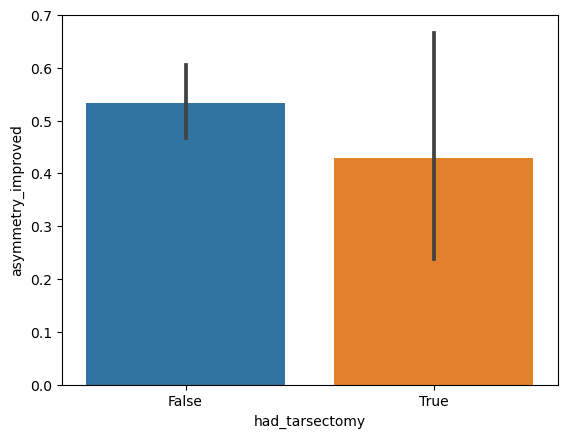

In [59]:
sns.barplot(x='had_tarsectomy', y='asymmetry_improved', data=df)

In [60]:
pd.crosstab(df['had_tarsectomy'], df['asymmetry_improved'], normalize='index')


asymmetry_improved,False,True
had_tarsectomy,,
False,0.466667,0.533333
True,0.571429,0.428571


In [61]:

# Make sure both X and y are numeric (e.g., 0 and 1)
X = df[['had_tarsectomy']].astype(int)  # Convert boolean to 0/1
X = sm.add_constant(X)

y = df['asymmetry_improved'].astype(int)  # Convert boolean to 0/1

# Fit logistic regression
model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.690144
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:     asymmetry_improved   No. Observations:                  216
Model:                          Logit   Df Residuals:                      214
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 May 2025   Pseudo R-squ.:                0.002790
Time:                        15:18:15   Log-Likelihood:                -149.07
converged:                       True   LL-Null:                       -149.49
Covariance Type:            nonrobust   LLR p-value:                    0.3611
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1335      0.144      0.930      0.352      -0.148       0.415
had_tarsectomy   

### Remove outliers 

In [62]:
outliers = df[df['preop_MRD1_asymmetry'] >= 2]
outliers

,id,patient_name,DOB,age,gender,surgery_date,surgery_type,follow_up(months),follow_up_category,levator_function,unilateral,tarsus_normal,tarsus_both,post_MMCR_ptosis,tissue_resected_mm_OD,tissue_resected_mm_OS,tarsus_resected_mm_OD,tarsus_resected_mm_OS,preop_MRD1_OD,preop_MRD1_OS,postop_MRD1_OD,postop_MRD1_OS,delta_MRD1_OD,delta_MRD1_OS,preop_MRD1_asymmetry,postop_MRD1_asymmetry,asymmetry_improved,had_tarsectomy,tarsus_resected_total
20,30,Carmen Soto,1933-07-14,75.079452,Female,2009-08-28,"OU upper lid ptosis posterior, OU lateral cant...",4.200000,4–8 months,12,False,False,False,False,4.0,8.0,0.0,0.0,3.040,0.809,4.39,4.147,1.350,3.338,2.231,0.243,True,False,0.0
26,440,Charles Gates,1940-03-27,70.295890,Male,2011-07-05,"OU upper lid bleph, OU upper lid ptosis, OS te...",0.933333,<4 months,15,False,True,False,False,NaN,8.0,0.0,1.0,-5.660,0.750,2.68,3.440,8.340,2.690,6.410,0.760,True,True,1.0
55,60,Esshagh Shoohed,1920-09-14,81.101370,Male,2002-12-06,"OU upper lid ptosis posterior, Lower lid bleph...",2.466667,<4 months,17,False,False,False,False,5.0,8.0,0.0,0.0,1.914,-0.248,3.14,1.600,1.226,1.848,2.162,1.540,True,False,0.0
100,486,June Rice,1950-10-19,52.698630,Female,2004-03-24,"OS upper lid ptosis posterior, OU lower bleph,...",28.300000,+1 year,15,False,False,False,False,NaN,5.0,0.0,0.0,4.821,2.690,3.25,2.940,-1.571,0.250,2.131,0.310,True,False,0.0
106,491,Larisa Tomashpolski,1938-10-03,66.994521,Female,2006-09-06,OU upper lid ptosis posterior,3.400000,<4 months,14,False,False,False,False,6.0,6.0,0.0,0.0,0.266,3.370,1.55,3.150,1.284,-0.220,3.104,1.600,True,False,0.0
119,113,Marcia Edelman,1931-05-08,74.904110,Female,2007-04-18,"OU upper lid ptosis posterior, OU lower lid ec...",2.766667,<4 months,14,False,False,False,False,8.0,4.0,0.0,0.0,2.740,0.694,2.73,1.891,-0.010,1.197,2.046,0.839,True,False,0.0
123,117,Mari Shimizu,1922-08-01,79.753425,Female,2003-06-11,OU upper lid ptosis,82.033333,+1 year,12,False,False,False,False,6.0,8.0,0.0,0.0,0.787,-1.270,2.18,1.380,1.393,2.650,2.057,0.800,True,False,0.0
125,502,Marilyn Sue Yager,1940-07-10,70.939726,Female,2012-06-13,OU upper lid ptosis posterior,9.400000,8–12 months,12,False,False,False,False,4.0,7.5,0.0,0.0,2.770,0.493,2.67,2.150,-0.100,1.657,2.277,0.520,True,False,0.0
141,278,Michael Trerotola,1950-08-30,61.134247,Male,2012-08-24,"OU upper lid bleph, OU upper lid ptosis poster...",3.366667,<4 months,15,False,True,False,False,8.0,4.0,1.0,0.0,-0.810,1.290,2.92,2.150,3.730,0.860,2.100,0.770,True,True,1.0
157,525,Renee Twersky-x,1961-08-14,38.156164,Female,2000-04-21,OU upper lid ptosis posterior,3.433333,<4 months,13,False,False,False,True,8.0,3.5,0.0,0.0,0.850,2.940,1.56,2.270,0.710,-0.670,2.090,0.710,True,False,0.0


In [63]:
import statsmodels.api as sm

# Filter out rows where preop_MRD1_asymmetry > 2
filtered_df = df[df['preop_MRD1_asymmetry'] <= 2]

# Ensure both X and y are numeric
X = filtered_df[['had_tarsectomy']].astype(int)  # Convert boolean to 0/1
X = sm.add_constant(X)

y = filtered_df['asymmetry_improved'].astype(int)  # Convert boolean to 0/1

# Fit logistic regression
model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.689690
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:     asymmetry_improved   No. Observations:                  205
Model:                          Logit   Df Residuals:                      203
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 May 2025   Pseudo R-squ.:                0.004971
Time:                        15:18:25   Log-Likelihood:                -141.39
converged:                       True   LL-Null:                       -142.09
Covariance Type:            nonrobust   LLR p-value:                    0.2346
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0430      0.147      0.293      0.769      -0.244       0.331
had_tarsectomy   

In [51]:
np.exp(model.params)

const             1.043956
had_tarsectomy    0.558772
dtype: float64

Text(0.5, 1.0, 'Pre-op Asymmetry by Tarsectomy Group')

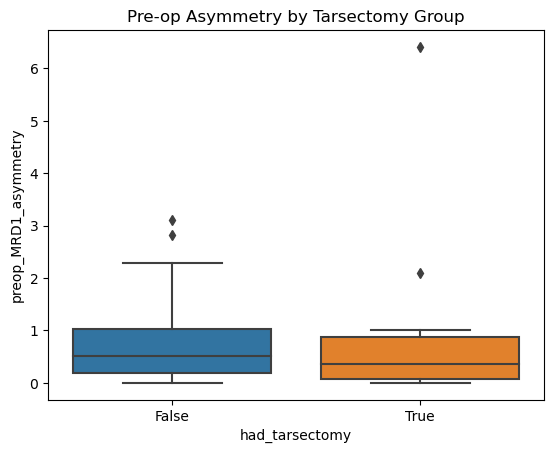

In [52]:
import seaborn as sns
sns.boxplot(x='had_tarsectomy', y='preop_MRD1_asymmetry', data=df)
plt.title('Pre-op Asymmetry by Tarsectomy Group')


Text(0.5, 1.0, 'Post-op Asymmetry by Tarsectomy Group')

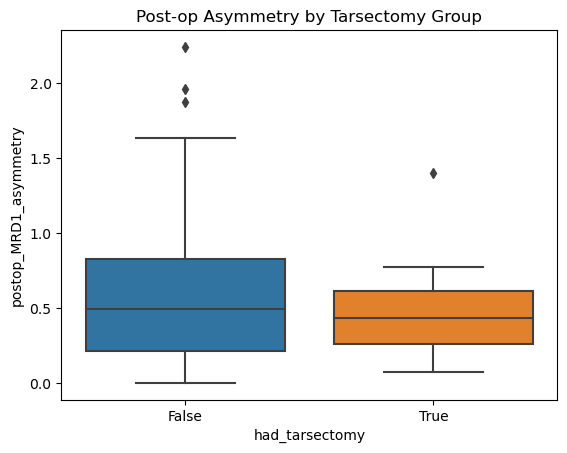

In [53]:
import seaborn as sns
sns.boxplot(x='had_tarsectomy', y='postop_MRD1_asymmetry', data=df)
plt.title('Post-op Asymmetry by Tarsectomy Group')

### Remove the Outliers

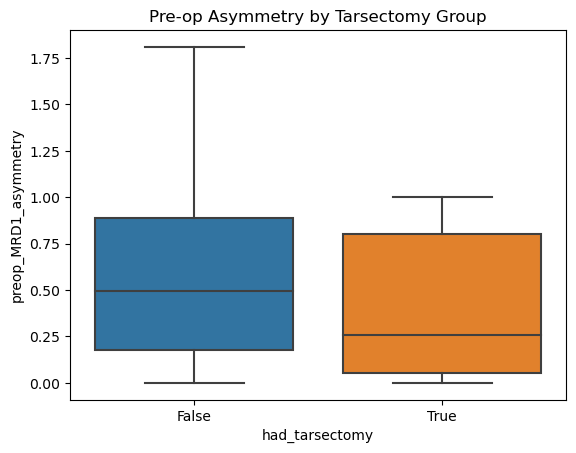

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out values of preop_MRD1_asymmetry greater than 2
filtered_df = df[df['preop_MRD1_asymmetry'] <= 2]

# Plot the boxplot with filtered data
sns.boxplot(x='had_tarsectomy', y='preop_MRD1_asymmetry', data=filtered_df)
plt.title('Pre-op Asymmetry by Tarsectomy Group')
plt.show()


Text(0.5, 1.0, 'Post-op Asymmetry by Tarsectomy Group')

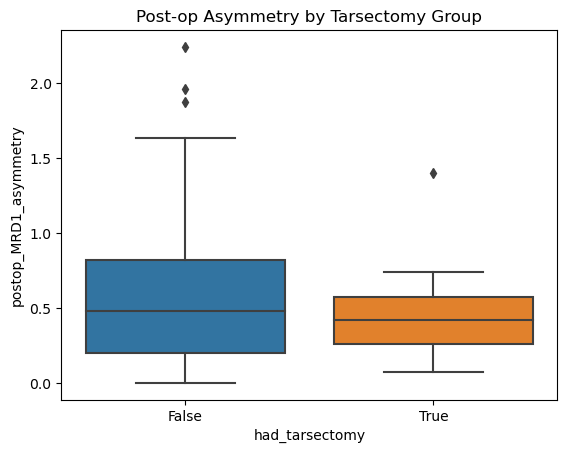

In [55]:
import seaborn as sns
sns.boxplot(x='had_tarsectomy', y='postop_MRD1_asymmetry', data=filtered_df)
plt.title('Post-op Asymmetry by Tarsectomy Group')

### Logistic Model (Pre Op MRD1 as a covariate)

In [67]:
# Define X with both predictor and covariate
X = df[['had_tarsectomy', 'preop_MRD1_asymmetry']].astype(float)
X = sm.add_constant(X)

# Response variable
y = df['asymmetry_improved'].astype(int)

# Fit logistic regression
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.491066
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     asymmetry_improved   No. Observations:                  216
Model:                          Logit   Df Residuals:                      213
Method:                           MLE   Df Model:                            2
Date:                Thu, 29 May 2025   Pseudo R-squ.:                  0.2904
Time:                        15:23:10   Log-Likelihood:                -106.07
converged:                       True   LL-Null:                       -149.49
Covariance Type:            nonrobust   LLR p-value:                 1.393e-19
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.7504      0.296     -5.911      0.000      -2.331      -1.170

### Tarsus Continous Model

In [56]:
df['tarsus_resected_total'] = df[['tarsus_resected_mm_OD', 'tarsus_resected_mm_OS']].sum(axis=1)

In [57]:
y = df['asymmetry_improved'].astype(int)

In [58]:
import statsmodels.api as sm

X = df[['tarsus_resected_total']].fillna(0)  # fill missing values if any
X = sm.add_constant(X)

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.688586
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:     asymmetry_improved   No. Observations:                  216
Model:                          Logit   Df Residuals:                      214
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 May 2025   Pseudo R-squ.:                0.005041
Time:                        13:40:44   Log-Likelihood:                -148.73
converged:                       True   LL-Null:                       -149.49
Covariance Type:            nonrobust   LLR p-value:                    0.2196
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1435      0.143      1.006      0.314      -0.136       0.

In [71]:
import statsmodels.api as sm

# Make sure the total tarsus resected column is calculated
df['tarsus_resected_total'] = df[['tarsus_resected_mm_OD', 'tarsus_resected_mm_OS']].sum(axis=1)

# Subset only patients who had a tarsectomy
tarsectomy_df = df[df['had_tarsectomy'] == 1]

# Drop rows with missing values in relevant columns
filtered_df = tarsectomy_df[['tarsus_resected_total', 'postop_MRD1_asymmetry']].dropna()

# Define X and y
X = filtered_df[['tarsus_resected_total']]
X = sm.add_constant(X)
y = filtered_df['postop_MRD1_asymmetry']

# Fit linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     postop_MRD1_asymmetry   R-squared:                       0.014
Model:                               OLS   Adj. R-squared:                 -0.038
Method:                    Least Squares   F-statistic:                    0.2758
Date:                   Thu, 29 May 2025   Prob (F-statistic):              0.606
Time:                           15:27:53   Log-Likelihood:                -3.2488
No. Observations:                     21   AIC:                             10.50
Df Residuals:                         19   BIC:                             12.59
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


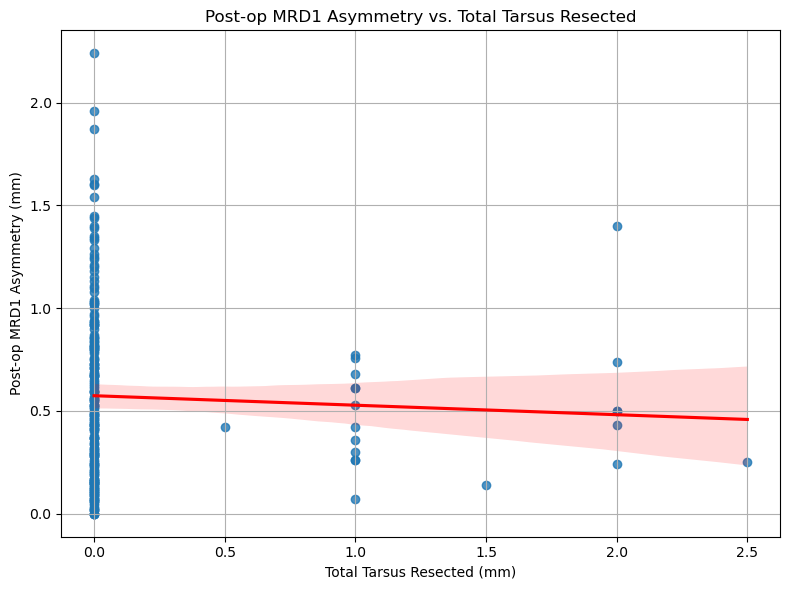

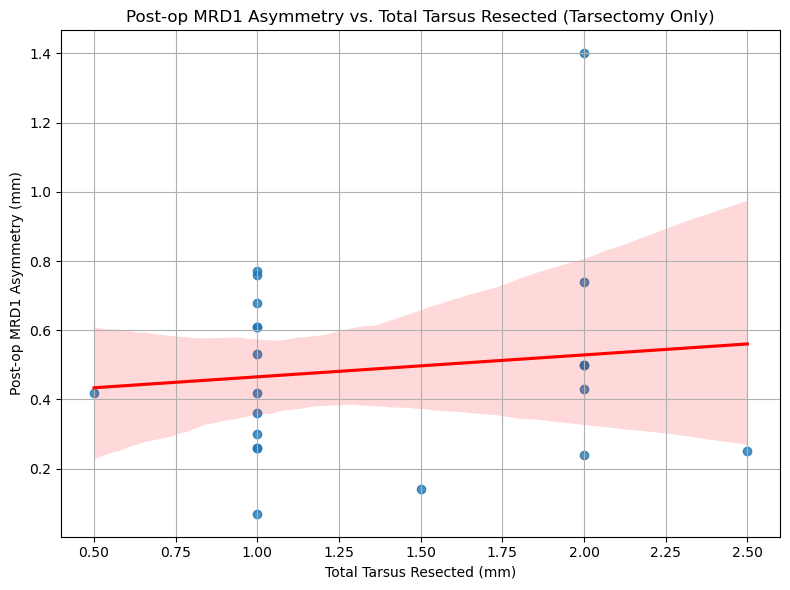

In [ ]:
# Make sure tarsus_resected_total is defined
df['tarsus_resected_total'] = df[['tarsus_resected_mm_OD', 'tarsus_resected_mm_OS']].sum(axis=1)

# Filter to include only patients who had a tarsectomy and drop missing values
tarsectomy_df = df[df['had_tarsectomy'] == 1]
filtered_df = tarsectomy_df[['tarsus_resected_total', 'postop_MRD1_asymmetry']].dropna()

# Plot
plt.figure(figsize=(8, 6))
sns.regplot(
    x='tarsus_resected_total',
    y='postop_MRD1_asymmetry',
    data=filtered_df,
    ci=95,
    line_kws={'color': 'red'}
)

plt.title('Post-op MRD1 Asymmetry vs. Total Tarsus Resected (Tarsectomy Only)')
plt.xlabel('Total Tarsus Resected (mm)')
plt.ylabel('Post-op MRD1 Asymmetry (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()


### More Control variables

##### EDA on Pre Op MRD1 Assymmetry Distribution

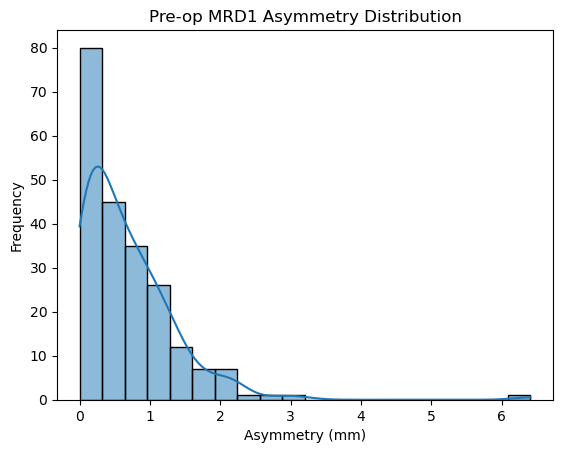

In [ ]:
# Histogram
sns.histplot(merged_wide_data['preop_MRD1_asymmetry'], bins=20, kde=True)
# sns.histplot(merged_wide_data['postop_MRD1_asymmetry'], bins=20, kde=True) # Try with Post Op
plt.title('Pre-op MRD1 Asymmetry Distribution')
plt.xlabel('Asymmetry (mm)')
plt.ylabel('Frequency')
plt.show()


In [35]:
merged_wide_data['preop_MRD1_asymmetry'].describe()
merged_wide_data['postop_MRD1_asymmetry'].describe()

count    216.000000
mean       0.568074
std        0.426509
min        0.000000
25%        0.230000
50%        0.490000
75%        0.810000
max        2.240000
Name: postop_MRD1_asymmetry, dtype: float64

### Create Model

In [ ]:
# Then analyze people who got tarsus in one eye and normal in the other

In [ ]:
merged_wide_data[merged_wide_data['tarsus_normal'] == True][['patient_name', 'id', 'tarsus_normal', 'tarsus_resected_mm_OD', 'tarsus_resected_mm_OS']]

,patient_name,id,tarsus_normal,tarsus_resected_mm_OD,tarsus_resected_mm_OS
0,Aaron Greenberg,2,True,1.0,0.0
7,Antone Cabral,204,True,0.0,1.0
13,Barbara Einziger,17,True,0.0,1.5
26,Charles Gates,440,True,0.0,1.0
50,Eleanor Safady,455,True,0.0,0.5
54,Ernesto Carrillo,224,True,0.0,1.0
68,Grace Bilezikjian,232,True,1.0,0.0
76,Hortensia Menchaca,474,True,1.0,0.0
91,Jeong Song,246,True,1.0,0.0
95,Joella West,87,True,1.0,0.0


In [ ]:
# Check with MMCR given data
merged_data[['id', 'patient_name']].merge(same_patient, left_on='id', right_on='#', how='inner')[['patient_name']].sort_values(by='patient_name').drop_duplicates().reset_index(drop=True)


,patient_name
0,Aaron Greenberg
1,Antone Cabral
2,Barbara Einziger
3,Charles Gates
4,Eleanor Safady
5,Ernesto Carrillo
6,Grace Bilezikjian
7,Hortensia Menchaca
8,Jeong Song
9,Joella West


In [ ]:
# Then analyze people who got tarsus in one eye and normal in the other

### Learning about the datasets/Checking the sheet names

In [ ]:
merged_data.head()

In [ ]:
# This shows all rows where 'column_name' has duplicated values (including the first occurrence)
# new_df = patient_all[patient_all['Patient_name'].duplicated(keep=False)].sort_values(by='Patient_name')
new_df = merged_data[merged_data['patient_name'].duplicated(keep=False)].sort_values(by='patient_name')


In [ ]:
tarsus_sum = new_df.groupby('Patient_name')['Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)'].sum()
valid_patients = tarsus_sum[tarsus_sum >= 1].index
filtered_df = new_df[new_df['Patient_name'].isin(valid_patients)]
filtered_df[['#', 'Sx Date', 'Surgery type on SX date', 'Patient_name', 'Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)']]

In [ ]:
# Check only the OU Surgery Types
filtered_df[filtered_df['Surgery type on SX date'].str.contains('ou', case=False, na=False)][['#', 'Sx Date', 'Surgery type on SX date', 'Patient_name', 'Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)']].shape

## NEW Dataset (Preliminary Cleaned by Andre)

#### Load Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# View All Columns Option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Read NEW.csv Dataset (Made by Andre)

In [ ]:
new_data = pd.read_csv('NEW.csv')

In [ ]:
new_data.tail()

### Clean OD/OS Column

In [ ]:
def od_os_classification(boolean, categorical):
    if pd.notna(boolean):
        if boolean == 1:
            return 'OS'
        elif boolean == 0:
            return 'OD'
    if pd.notna(categorical):
        if categorical == 'OS':
            return 'OS'
        elif categorical == 'OD':
            return 'OD'
    
new_data['OD/OS'] = new_data.apply(lambda x: od_os_classification(x['Eye (OD=0, OS=1)'], x['OD/OS']), axis=1)

In [ ]:
new_data[['Eye (OD=0, OS=1)', 'OD/OS']].tail(10)

### Output CSV

In [ ]:
new_data.head()

In [ ]:
new_data.to_csv('new_updated.csv')

### Create Model 

In [ ]:
# Step 1: Load the data
df = new_data

# Step 2: Select and clean relevant columns
df['Tarsus_Resected'] = pd.to_numeric(
    df['Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)'],
    errors='coerce'
)
df['PostOp_MRD1'] = pd.to_numeric(
    df['Most recent Post Op MRD1'],
    errors='coerce'
)

# Drop missing values
model_data = df[['Tarsus_Resected', 'PostOp_MRD1']].dropna()

# Drop missing values
model_data = df[['Tarsus_Resected', 'PostOp_MRD1']].dropna()

# Step 3: Split into training and test sets
X = model_data[['Tarsus_Resected']]
y = model_data['PostOp_MRD1']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Step 1: Load the data
df = new_data

# Step 2: Select and clean relevant columns
df['Tarsus_Resected'] = pd.to_numeric(
    df['Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)'],
    errors='coerce'
)
df['PostOp_MRD1'] = pd.to_numeric(
    df['Most recent Post Op MRD1'],
    errors='coerce'
)

# Drop missing values
model_data = df[['Tarsus_Resected', 'PostOp_MRD1']].dropna()

# Step 3: Split into training and test sets
X = model_data[['Tarsus_Resected']]
y = model_data['PostOp_MRD1']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Step 4: Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 5: Print model results
print("Model Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")
print(f"R² score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

# Step 6: Plot the regression
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='skyblue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Post-Op MRD1 vs Tarsus Resected')
plt.xlabel('Tarsus Resected (mm)')
plt.ylabel('Post-Op MRD1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Load your data
df = new_data  # Replace with your actual file path

# Select relevant numeric features and the target
features = [
    'MMCR (0), ELR (1)',
    'Gender (Male = 1, Female = 2)',
    'Age',
    'Eye (OD=0, OS=1)',
    'Surgical eye (yes=1, no =0)',
    'Tissue Resected (mm)',
    'Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)',
    'Length of follow up (mo)',
    'Preop_MRD1'
]
target = 'Most recent Post Op MRD1'

# Prepare the data
data = df[features + [target]].copy()
data = data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
data = data.dropna()  # Drop rows with NA

# Split into X and y
X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit the decision tree regressor
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Evaluate the model
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=features, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Predicting Post-Op MRD1")
plt.show()